kaggle competition https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
public score 0.13

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle competitions list

ref                                                                              deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/blood-vessel-segmentation                    2024-02-06 23:59:00  Research           $80,000       1097           False  
https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data  2024-04-23 23:59:00  Featured           $60,000        584           False  
https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification    2024-04-08 23:59:00  Research           $50,000        991           False  
https://www.kaggle.com/competitions/playground-series-s4e2                       2024-02-29 23:59:00  Playground            Swag        201           False  
https://www.kaggle.com/competitions/titanic         

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 61.2MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.shape

(1459, 80)

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: ylabel='Frequency'>

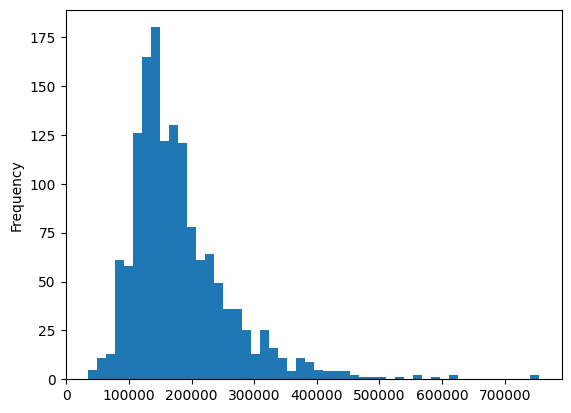

In [ ]:
import matplotlib.pyplot as plt

df['SalePrice'].plot.hist(bins=50)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

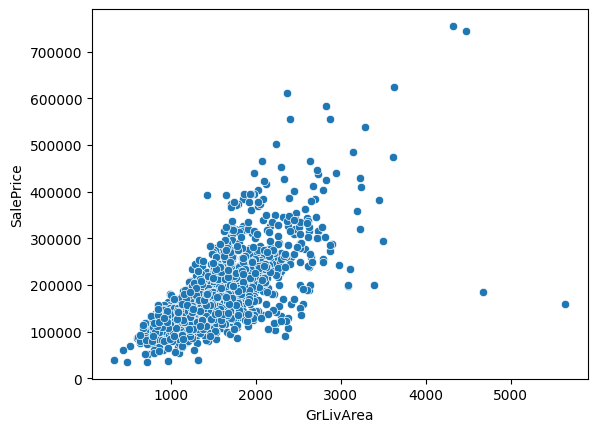

In [ ]:
import seaborn as sns
sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice')

In [ ]:
df['logPrice'] = df['SalePrice'].apply(np.log, axis = 1)

<Axes: xlabel='GrLivArea', ylabel='logPrice'>

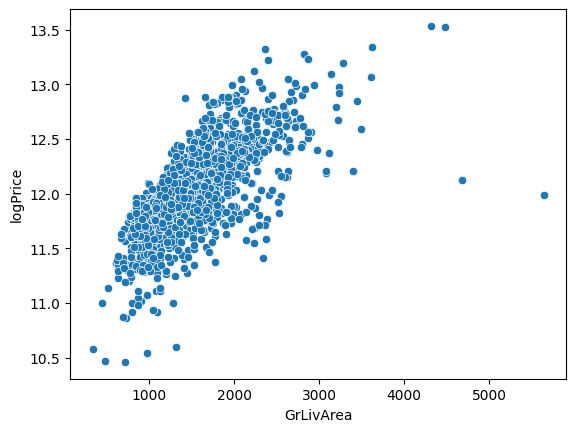

In [ ]:
sns.scatterplot(data = df, x = 'GrLivArea', y = 'logPrice')

In [ ]:
s_train = df.isna().sum()

In [ ]:
s_train.loc[s_train.values != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
null_columns = s_train.loc[s_train.values != 0].index
int_columns = df.columns[df.dtypes != 'object']

In [ ]:
def nan_filler_train(df):
  df.Alley.fillna('NaN', inplace = True)
  df.MasVnrType.fillna('None', inplace = True)
  for column in null_columns:
    if column in int_columns:
      df[column].fillna(0, inplace = True)
    else:
      df[column].fillna('NA', inplace = True)

In [ ]:
nan_filler_train(df)
nan_filler_train(df_test)

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [ ]:
s_test = df_test.isna().sum()
nan_columns_test = s_test.loc[s_test.values != 0].index

In [ ]:
s_test.loc[s_test.values != 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [ ]:
nan_columns_test

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

In [ ]:
def nan_filler_test(df):
  for column in nan_columns_test:
    if column in int_columns:
      df[column].fillna(df[column].mean(), inplace = True)
    else:
      df[column].fillna(df[column].value_counts().index[0], inplace = True)

In [ ]:
nan_filler_test(df_test)

In [ ]:
Y = df.logPrice
eY = df.SalePrice
df.drop(columns = ['SalePrice', 'logPrice'], inplace = True)

<Axes: ylabel='Frequency'>

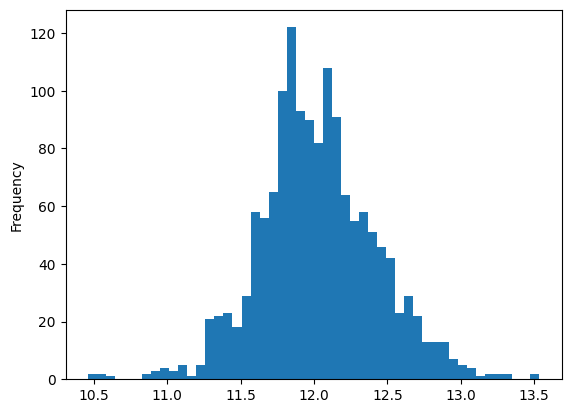

In [ ]:
Y.plot.hist(bins=50)

In [ ]:
X = pd.concat([df, df_test])

In [ ]:
X.shape

(2919, 80)

In [ ]:
first_test_id = df_test.Id[0]
first_test_id

1461

In [ ]:
X.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,11,2006,WD,Normal


In [ ]:
df.columns[df.dtypes == 'object']

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
enc_columns = list(X.columns[X.dtypes == 'object']) + ['MSSubClass', 'OverallQual', 'OverallCond']

In [ ]:
X = pd.get_dummies(X, columns = enc_columns)

In [ ]:
X.shape

(2919, 336)

In [ ]:
X.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,1,0,0,0,0
1,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,1,0,0,0,0
3,4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,0,0,1,0,0,0,0
4,5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train = X.loc[X.Id < first_test_id]
X_train.drop(columns = ['Id'], inplace = True)

<ipython-input-228-2bf5faaaf788>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Id'], inplace = True)


In [ ]:
X_subm = X.loc[X.Id >= first_test_id]

In [ ]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [ ]:
xgb_model = xgb.XGBRegressor(max_depth = 4, n_estimators = 500, learning_rate = 0.1)

In [ ]:
lgb_model = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=500, max_depth=4, verbose = -1)

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
ert_model = ExtraTreesRegressor()

In [ ]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: logPrice, dtype: float64

In [ ]:
rmse_scores = {'xgb' : [], 'lgb' : [], 'rf' : [], 'ens' : [], 'extra' : []}
kf = KFold(n_splits = 5, shuffle=True, random_state = 19)

for train_index, test_index in kf.split(X_scaled, Y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]
    xgb_model.fit(X_train_fold, Y_train_fold)
    lgb_model.fit(X_train_fold, Y_train_fold)
    rmse_scores['ens'].append(MSE(Y_test_fold, xgb_model.predict(X_test_fold)/2 + lgb_model.predict(X_test_fold)/2)**(1/2))
    rmse_scores['xgb'].append(MSE(Y_test_fold, xgb_model.predict(X_test_fold))**(1/2))
    rmse_scores['lgb'].append(MSE(Y_test_fold, lgb_model.predict(X_test_fold))**(1/2))

In [ ]:
from sklearn.linear_model import RANSACRegressor, HuberRegressor

In [ ]:
ransac = RANSACRegressor()
huber = HuberRegressor()

In [ ]:
robust_rmse_scores = {'ransac' : [], 'huber' : []}
kf = KFold(n_splits = 5, shuffle=True, random_state = 19)

for train_index, test_index in kf.split(X_scaled, Y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]
    ransac.fit(X_train_fold, Y_train_fold)
    huber.fit(X_train_fold, Y_train_fold)
    robust_rmse_scores['ransac'].append(MSE(Y_test_fold, ransac.predict(X_test_fold))**(1/2))
    robust_rmse_scores['huber'].append(MSE(Y_test_fold, huber.predict(X_test_fold))**(1/2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

In [ ]:
print(robust_rmse_scores)

{'ransac': [3567735863.9257917, 3181629644.616788, 1987069576.4475677, 211505686.0719329, 784330188.2096319], 'huber': [0.16604593204330828, 0.1351624472713202, 0.12430188114116085, 0.17547763564811236, 0.10989683393236872]}


In [ ]:
print(rmse_scores)

{'xgb': [0.14839968920782384, 0.13623832310601264, 0.14125597789959848, 0.12185014054835899, 0.11936242189317467], 'lgb': [0.1403731021371692, 0.14248573751214624, 0.14263787900121874, 0.1345353144208557, 0.11800078712072946], 'rf': [], 'ens': [0.14167160431802459, 0.13710767093375575, 0.13811914291533323, 0.12444258286108369, 0.11495869570596742], 'extra': []}


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import StackingRegressor
import catboost as cb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
estimators = [('xgb', xgb.XGBRegressor(max_depth = 4, n_estimators = 500, learning_rate = 0.1)),
        ('lgbm', lgb.LGBMRegressor(learning_rate=0.1, n_estimators=500, max_depth=4, verbose = -1)),
        ('cb', cb.CatBoostRegressor(learning_rate=0.1, n_estimators=500, max_depth=4, verbose=0))]

reg = StackingRegressor(
     estimators=estimators,
     final_estimator = HuberRegressor(alpha = 0.9, epsilon = 2))

In [ ]:
for train_index, test_index in kf.split(X_scaled, Y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]
    reg.fit(X_train_fold, Y_train_fold)
    print(MSE(Y_test_fold, reg.predict(X_test_fold)/2 + reg.predict(X_test_fold)/2)**(1/2))

0.13830066575150857
0.1296791734837875
0.1225010107202974
0.12552869335720876
0.10720107251422613


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
cv = KFold(n_splits=5, shuffle = True, random_state=19)
grid = dict()
grid['final_estimator__epsilon'] = np.arange(2, 3, 0.1)
search = GridSearchCV(reg, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(X_scaled, Y)

In [ ]:
print('Config: %s' % results.best_params_)
print('RMSE: %.3f' % results.best_score_)

Config: {'final_estimator__epsilon': 2.0}
RMSE: -0.125


In [ ]:
print(Y.max())

13.534473028231162


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [ ]:
import catboost as cb

In [ ]:
cb_model = cb.CatBoostRegressor()

In [ ]:
df.drop(columns = ['SalePrice', 'logPrice'], inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=19)

In [ ]:
cb_model.fit(x_train, y_train)

Learning rate set to 0.041954
0:	learn: 0.3905869	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.3807936	total: 72.6ms	remaining: 36.2s
2:	learn: 0.3716250	total: 82.5ms	remaining: 27.4s
3:	learn: 0.3622031	total: 89.7ms	remaining: 22.3s
4:	learn: 0.3530894	total: 102ms	remaining: 20.2s
5:	learn: 0.3444481	total: 109ms	remaining: 18.1s
6:	learn: 0.3357025	total: 119ms	remaining: 16.9s
7:	learn: 0.3272046	total: 132ms	remaining: 16.3s
8:	learn: 0.3198561	total: 148ms	remaining: 16.3s
9:	learn: 0.3122019	total: 156ms	remaining: 15.4s
10:	learn: 0.3055125	total: 164ms	remaining: 14.7s
11:	learn: 0.2986027	total: 171ms	remaining: 14.1s
12:	learn: 0.2917489	total: 178ms	remaining: 13.5s
13:	learn: 0.2853004	total: 186ms	remaining: 13.1s
14:	learn: 0.2791535	total: 200ms	remaining: 13.2s
15:	learn: 0.2735868	total: 213ms	remaining: 13.1s
16:	learn: 0.2678368	total: 220ms	remaining: 12.7s
17:	learn: 0.2624733	total: 228ms	remaining: 12.5s
18:	learn: 0.2572280	total: 236ms	remaining: 12.2s
19:	lea

In [ ]:
print(xgb_model.feature_importances_)

[4.50151128e-04 1.43599499e-03 3.02859824e-02 4.58740909e-03
 4.85559402e-04 3.27991112e-03 5.56169136e-04 4.02618723e-04
 5.84570831e-03 3.75285000e-03 2.78657232e-03 2.92022858e-04
 3.83385904e-02 7.04693515e-03 3.63888830e-05 1.31625193e-03
 1.26798532e-03 1.80039322e-03 1.78366248e-02 1.31080684e-03
 2.66817752e-02 1.80932856e-03 7.93948770e-02 1.35079422e-03
 2.80786218e-04 4.67099104e-04 1.21072691e-03 1.24600134e-04
 5.60272019e-04 1.26077735e-04 4.07351326e-04 3.65355663e-04
 3.45405715e-04 1.19904466e-02 1.08528347e-03 5.51587982e-05
 1.08953519e-02 4.74678865e-03 0.00000000e+00 0.00000000e+00
 2.79405271e-04 3.97236690e-05 6.58572011e-04 8.09103425e-04
 6.84688566e-04 0.00000000e+00 1.06211938e-03 1.05431667e-04
 3.58152785e-03 1.95545785e-04 2.40716944e-03 0.00000000e+00
 0.00000000e+00 1.54013338e-03 2.24318108e-04 1.62326760e-04
 0.00000000e+00 5.08285084e-05 2.29437626e-03 0.00000000e+00
 3.58515675e-03 2.46018870e-04 0.00000000e+00 9.45891952e-05
 4.13569476e-04 7.474558

In [ ]:
MSE(y_test, cb_model.predict(x_test)) ** (1/2)

0.14372989497584218

In [ ]:
ids = X_subm.Id
X_subm.drop(columns = ['Id'], inplace = True)

AttributeError: 'DataFrame' object has no attribute 'Id'

In [ ]:
X_subm.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,0,0,0,1,0,0,0
1,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,...,0,0,0,0,0,0,1,0,0,0
2,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,...,0,0,0,0,0,1,0,0,0,0
3,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,...,0,0,0,0,0,0,1,0,0,0
4,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
X_subm_scaled = scaler.transform(X_subm)

In [ ]:
preds = reg.predict(X_subm_scaled)

In [ ]:
df_preds = pd.DataFrame(data = [ids, preds]).T

In [ ]:
df_preds.head()

,Id,Unnamed 0
0,1461.0,118471.754800
1,1462.0,164533.351603
2,1463.0,186711.462204
3,1464.0,194638.445665
4,1465.0,203912.626081


In [ ]:
df_preds['Id'] = df_preds['Id'].astype('int')

In [ ]:
df_preds.rename(columns = {'Unnamed 0' : 'SalePrice'}, inplace = True)

In [ ]:
df_preds['SalePrice'] = df_preds['logPrice'].apply(np.exp, axis = 1)
df_preds.head()

,Id,logPrice,SalePrice
0,1461,11.741035,125622.330454
1,1462,11.937311,152865.113499
2,1463,12.198472,198485.569784
3,1464,12.225354,203893.767525
4,1465,12.126088,184626.185941


In [ ]:
df_preds.drop(columns = ['logPrice'], inplace = True)

In [ ]:
df_preds.to_csv('subm4.csv', index = False)

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X_scaled)

fit = sm.OLS(eY, X_scaled).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     64.68
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:38:29   Log-Likelihood:                -16510.
No. Observations:                1460   AIC:                         3.358e+04
Df Residuals:                    1181   BIC:                         3.505e+04
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3697.4065   7074.209      0.523      0.6

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.head()
scaled_df = X_scaled_df.join(eY)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,SalePrice
0,0.207668,0.033420,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,208500
1,0.255591,0.038795,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,0.217252,0.046507,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223500
3,0.191693,0.038561,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140000
4,0.268371,0.060576,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250000


In [ ]:
import statsmodels.formula.api as smf
#define weights to use
wt = 1 / smf.ols('fit.resid.abs() ~ fit.fittedvalues', data = scaled_df).fit().fittedvalues**2

#fit weighted least squares regression model
fit_wls = sm.WLS(eY, X_scaled, weights=wt).fit()

#view summary of weighted least squares regression model
print(fit_wls.summary())

                            WLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     99.09
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:46:27   Log-Likelihood:                -16131.
No. Observations:                1460   AIC:                         3.282e+04
Df Residuals:                    1181   BIC:                         3.430e+04
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2066.1452   5325.481      0.388      0.6

In [ ]:
preds = fit_wls.predict(X_subm_scaled)